In [1]:

import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,plot_confusion_matrix,roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc
np.random.seed(20)

import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
import torch
from torch.utils.data import DataLoader, Dataset


In [2]:
dataset = pd.read_csv('./data/dataset_2.csv')

In [3]:
# Observación estadística de los datos
dataset.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [4]:
# Chequeo si hay datos nulos
dataset.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [5]:
# Observamos la informacion de cada variable
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
# Visualizar los índices de las compras menores o iguales 9000 antes
# de ser modificadas.
list_detection_purchase_to_modified=dataset[dataset['Purchase']<=9000].index
list_detection_purchase_to_modified

Int64Index([     0,      2,      3,      4,      9,     10,     11,     12,
                14,     15,
            ...
            550058, 550059, 550060, 550061, 550062, 550063, 550064, 550065,
            550066, 550067],
           dtype='int64', length=330871)

In [7]:
#Reemplazar con 0 aquellas compras menores o iguales a 9000.
dataset.loc[dataset.Purchase<=9000,'Purchase']=0

In [8]:
# Visualizar los índices de las compras mayores a 9000 antes
# de ser modificadas.
list_detection_purchase_to_modified=dataset[dataset['Purchase']>9000].index
list_detection_purchase_to_modified

Int64Index([     1,      5,      6,      7,      8,     13,     16,     18,
                19,     21,
            ...
            545882, 545884, 545887, 545891, 545892, 545896, 545904, 545908,
            545910, 545914],
           dtype='int64', length=219197)

In [9]:
#Reemplazar con 1 aquellas compras mayores a 9000.
dataset.loc[dataset.Purchase>9000,'Purchase']=1

Purchase
0    330871
1    219197
Name: Purchase, dtype: int64


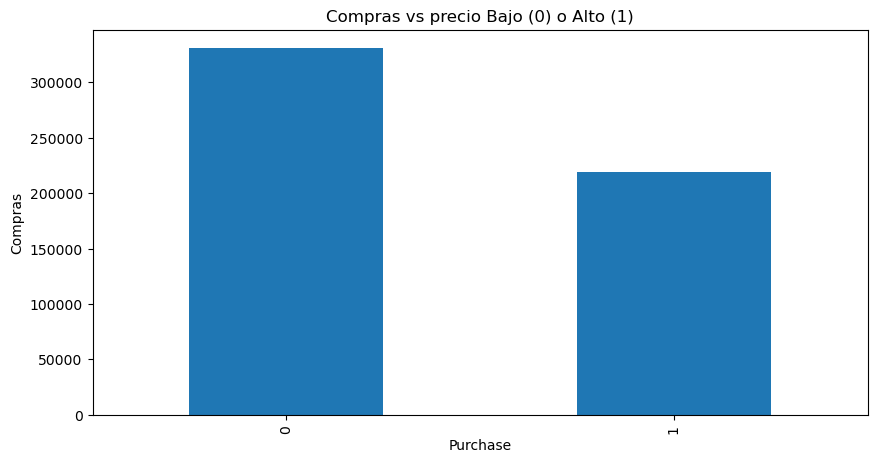

In [10]:
# Vemos el balance de cada una de las clases
print(dataset.groupby(['Purchase']).Purchase.count())
dataset.groupby(['Purchase']).Purchase.count().plot(kind="bar",figsize=(10,5))
plt.ylabel("Compras")

plt.title("Compras vs precio Bajo (0) o Alto (1)")
plt.show()

In [11]:
# Grupos de la variable Gender
dataset.groupby(['Gender']).Gender.count()

Gender
F    135809
M    414259
Name: Gender, dtype: int64

In [12]:
# Asigno un 0 al genero Masculino
dataset.loc[dataset.Gender=='M','Gender']=0

In [13]:
# Asigno un 1 al genero Femenino
dataset.loc[dataset.Gender=='F','Gender']=1

In [14]:
dataset["Gender"]=dataset["Gender"].astype(int)

<AxesSubplot:xlabel='Age'>

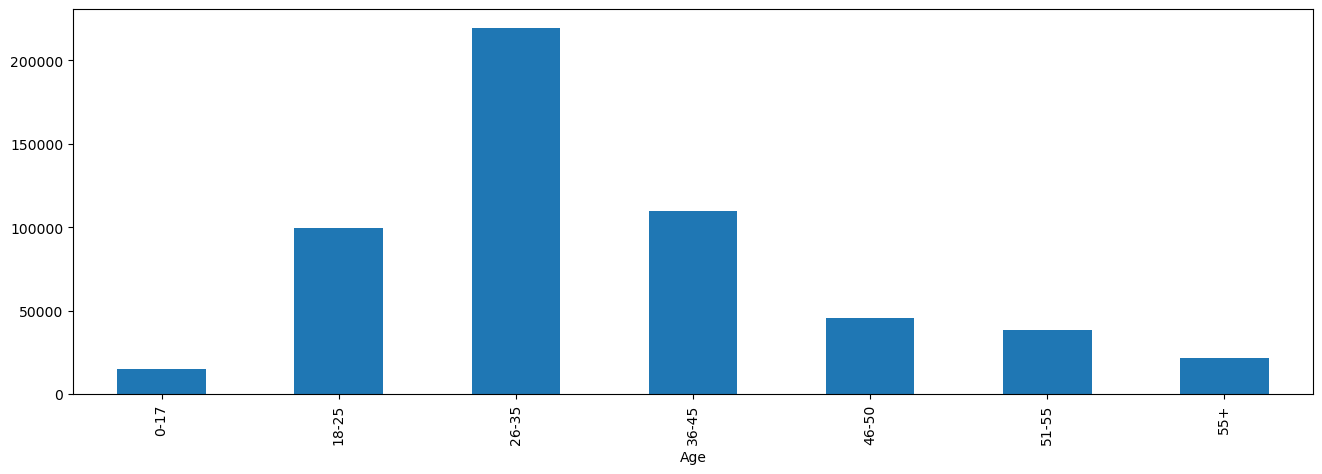

In [15]:
# Vemos como son los datos para la edad
plt.figure(figsize=(16,5))
dataset.groupby(['Age']).Age.count().plot(kind='bar')
# dataset.groupby(['Age']).Age.count()


In [16]:
# Vemos que son 7 categorias, por lo que se aplica One Hot Encoding

city_age_dummies = pd.get_dummies(dataset["Age"], prefix="Age")
city_age_dummies.info() 
# Concatenamos con el dataset original
df = pd.concat([dataset, city_age_dummies], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   Age_0-17   550068 non-null  uint8
 1   Age_18-25  550068 non-null  uint8
 2   Age_26-35  550068 non-null  uint8
 3   Age_36-45  550068 non-null  uint8
 4   Age_46-50  550068 non-null  uint8
 5   Age_51-55  550068 non-null  uint8
 6   Age_55+    550068 non-null  uint8
dtypes: uint8(7)
memory usage: 3.7 MB


In [17]:
dataset=dataset.drop(["Age"], axis=1)

<AxesSubplot:xlabel='Occupation'>

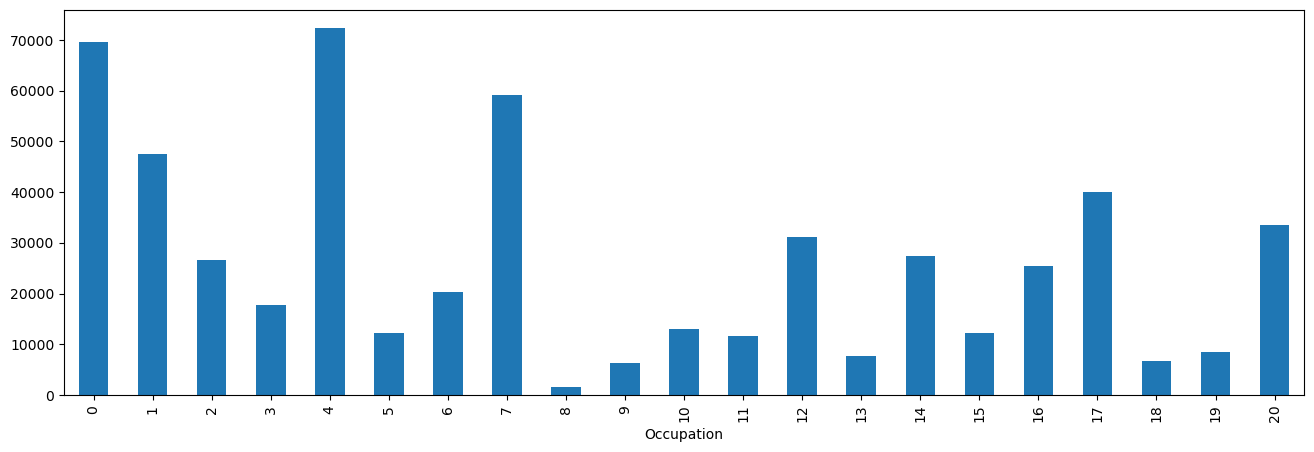

In [18]:
# Vemos los datos de la variable Occupation

plt.figure(figsize=(16,5))
dataset.groupby(['Occupation']).Occupation.count().plot(kind='bar')

In [19]:
occupation_dummies = pd.get_dummies(dataset["Occupation"], prefix="Occupation")
occupation_dummies.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Occupation_0   550068 non-null  uint8
 1   Occupation_1   550068 non-null  uint8
 2   Occupation_2   550068 non-null  uint8
 3   Occupation_3   550068 non-null  uint8
 4   Occupation_4   550068 non-null  uint8
 5   Occupation_5   550068 non-null  uint8
 6   Occupation_6   550068 non-null  uint8
 7   Occupation_7   550068 non-null  uint8
 8   Occupation_8   550068 non-null  uint8
 9   Occupation_9   550068 non-null  uint8
 10  Occupation_10  550068 non-null  uint8
 11  Occupation_11  550068 non-null  uint8
 12  Occupation_12  550068 non-null  uint8
 13  Occupation_13  550068 non-null  uint8
 14  Occupation_14  550068 non-null  uint8
 15  Occupation_15  550068 non-null  uint8
 16  Occupation_16  550068 non-null  uint8
 17  Occupation_17  550068 non-null  uint8
 18  Occupation_18  550068 no

In [20]:
dataset = pd.concat([dataset, occupation_dummies], axis=1)
dataset=dataset.drop(["Occupation"], axis=1)

<AxesSubplot:xlabel='City_Category'>

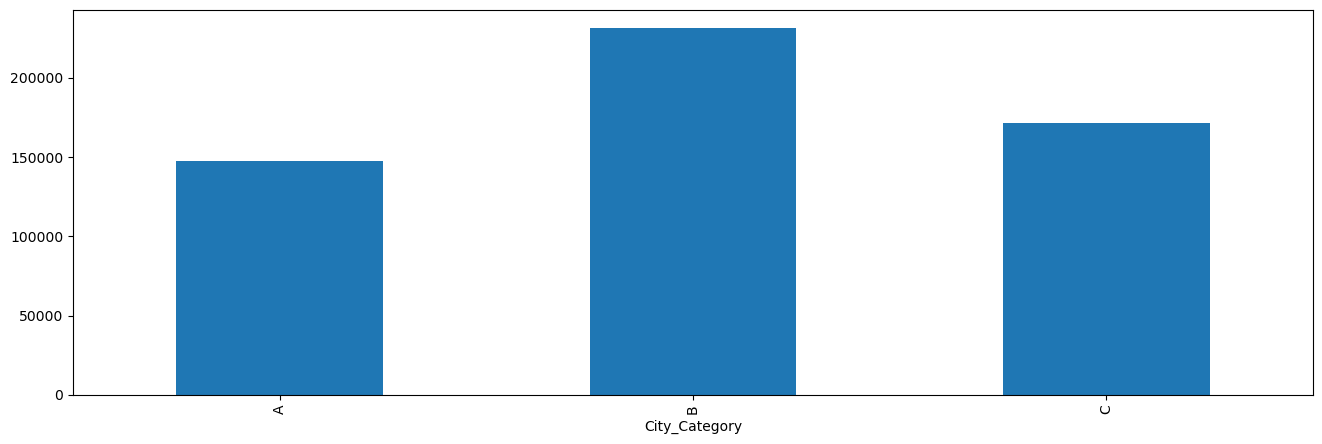

In [21]:
# Variable City Category

plt.figure(figsize=(16,5))
dataset.groupby(['City_Category']).City_Category.count().plot(kind='bar')

In [22]:
city_category_dummies = pd.get_dummies(dataset["City_Category"], prefix="City_Category")
city_category_dummies.info() 
dataset = pd.concat([dataset, city_category_dummies], axis=1)
dataset=dataset.drop(["City_Category"], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   City_Category_A  550068 non-null  uint8
 1   City_Category_B  550068 non-null  uint8
 2   City_Category_C  550068 non-null  uint8
dtypes: uint8(3)
memory usage: 1.6 MB


<AxesSubplot:xlabel='Stay_In_Current_City_Years'>

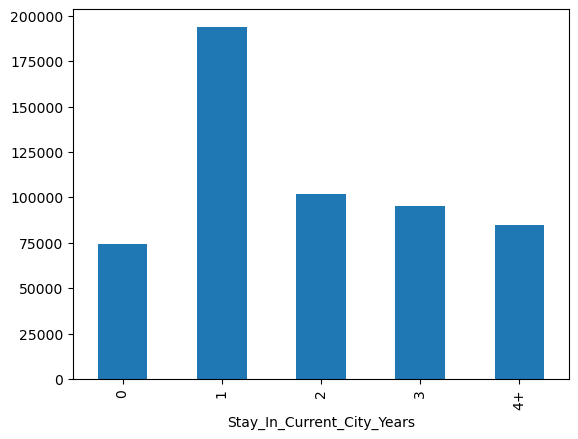

In [23]:
# Variable Stay_In_Current_City_Years

dataset.groupby(['Stay_In_Current_City_Years']).Stay_In_Current_City_Years.count().plot(kind='bar')

In [24]:
city_category_dummies = pd.get_dummies(dataset["Stay_In_Current_City_Years"], prefix="Stay_In_Current_City_Years")
city_category_dummies.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   Stay_In_Current_City_Years_0   550068 non-null  uint8
 1   Stay_In_Current_City_Years_1   550068 non-null  uint8
 2   Stay_In_Current_City_Years_2   550068 non-null  uint8
 3   Stay_In_Current_City_Years_3   550068 non-null  uint8
 4   Stay_In_Current_City_Years_4+  550068 non-null  uint8
dtypes: uint8(5)
memory usage: 2.6 MB


In [25]:
dataset = pd.concat([dataset, city_category_dummies], axis=1)
dataset=dataset.drop(["Stay_In_Current_City_Years"], axis=1)

<AxesSubplot:xlabel='Marital_Status'>

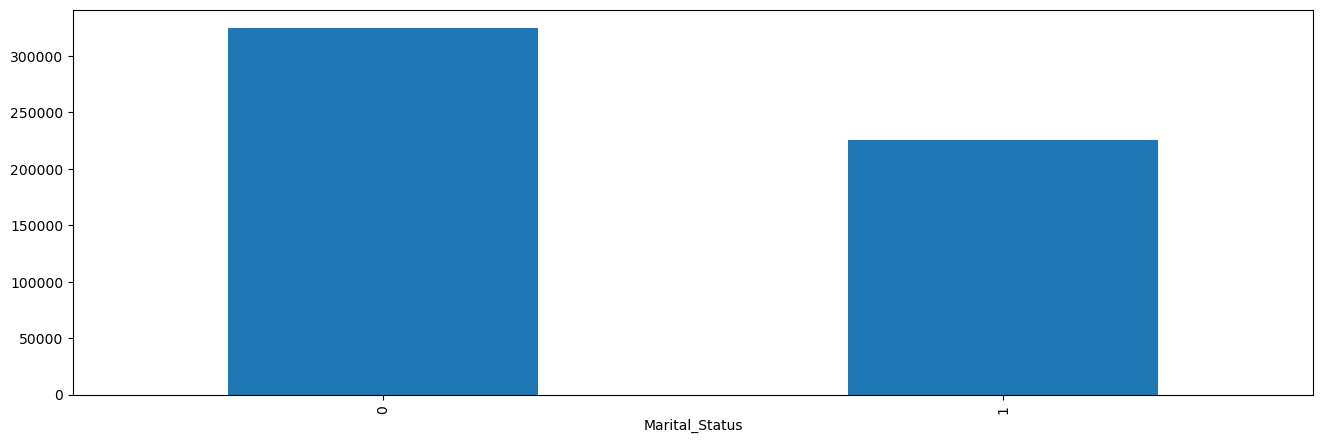

In [26]:
# Vemos la variable Marital_Status

plt.figure(figsize=(16,5))
dataset.groupby(['Marital_Status']).Marital_Status.count().plot(kind='bar')

<AxesSubplot:xlabel='Product_Category_1'>

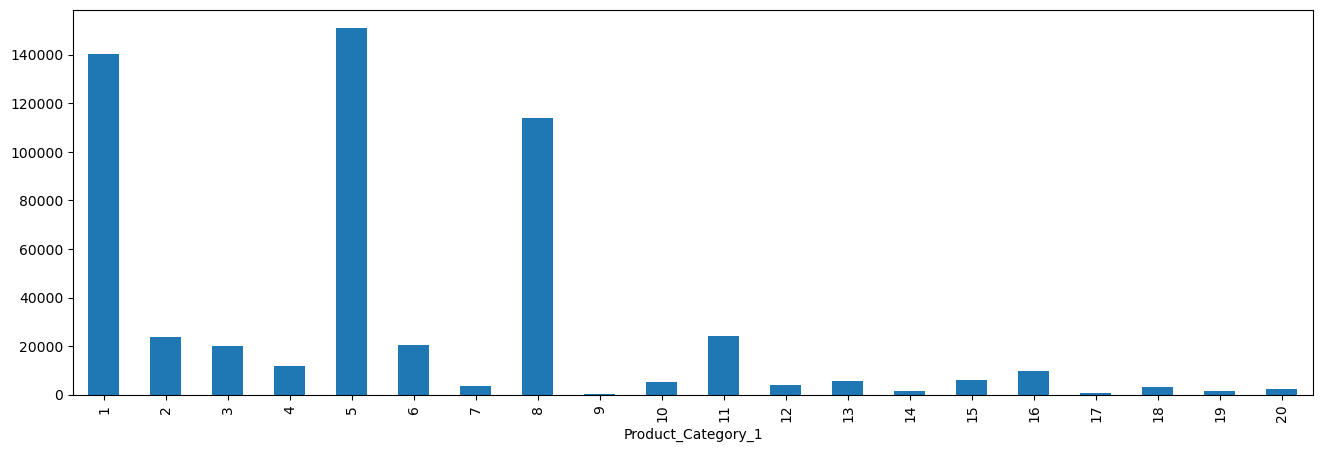

In [27]:
# Cantidad de grupos de productos

plt.figure(figsize=(16,5))
dataset.groupby(['Product_Category_1']).Product_Category_1.count().plot(kind='bar')

In [28]:
product_category_1_dummies = pd.get_dummies(dataset["Product_Category_1"], prefix="Product_Category_1")
product_category_1_dummies.info() 
dataset = pd.concat([dataset, product_category_1_dummies], axis=1)
dataset=dataset.drop(["Product_Category_1"], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   Product_Category_1_1   550068 non-null  uint8
 1   Product_Category_1_2   550068 non-null  uint8
 2   Product_Category_1_3   550068 non-null  uint8
 3   Product_Category_1_4   550068 non-null  uint8
 4   Product_Category_1_5   550068 non-null  uint8
 5   Product_Category_1_6   550068 non-null  uint8
 6   Product_Category_1_7   550068 non-null  uint8
 7   Product_Category_1_8   550068 non-null  uint8
 8   Product_Category_1_9   550068 non-null  uint8
 9   Product_Category_1_10  550068 non-null  uint8
 10  Product_Category_1_11  550068 non-null  uint8
 11  Product_Category_1_12  550068 non-null  uint8
 12  Product_Category_1_13  550068 non-null  uint8
 13  Product_Category_1_14  550068 non-null  uint8
 14  Product_Category_1_15  550068 non-null  uint8
 15  Product_Category_

<AxesSubplot:xlabel='Product_Category_2'>

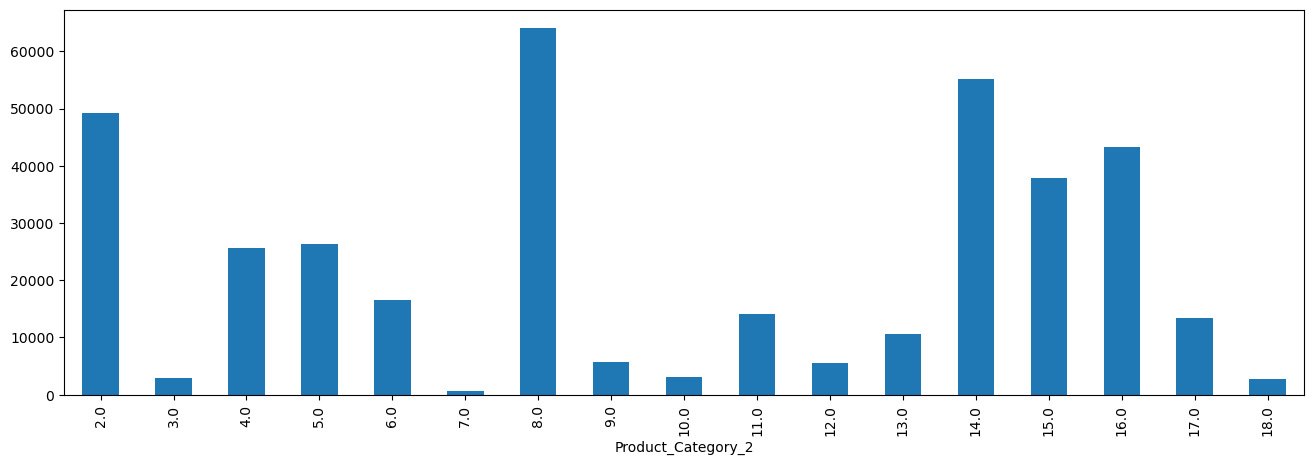

In [29]:
# Para el grupo de categoria 2 debemos tratar ademas los datos nulos



plt.figure(figsize=(16,5))
dataset.groupby(['Product_Category_2']).Product_Category_2.count().plot(kind='bar')


In [30]:
dataset['Product_Category_2'].isna().sum()

173638

In [31]:
#Reemplazar con 0 cuando no tiene categoría (NaNs).
dataset.loc[dataset.Product_Category_2.isna(),'Product_Category_2']=0
# Cantidad de filas que poseen NaNs en la característica.
dataset['Product_Category_2'].isna().sum()
dataset["Product_Category_2"]=dataset["Product_Category_2"].astype(int)
product_category_2_dummies = pd.get_dummies(dataset["Product_Category_2"], prefix="Product_Category_2")
product_category_2_dummies.info() 
dataset = pd.concat([dataset, product_category_2_dummies], axis=1)
dataset=dataset.drop(["Product_Category_2"], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   Product_Category_2_0   550068 non-null  uint8
 1   Product_Category_2_2   550068 non-null  uint8
 2   Product_Category_2_3   550068 non-null  uint8
 3   Product_Category_2_4   550068 non-null  uint8
 4   Product_Category_2_5   550068 non-null  uint8
 5   Product_Category_2_6   550068 non-null  uint8
 6   Product_Category_2_7   550068 non-null  uint8
 7   Product_Category_2_8   550068 non-null  uint8
 8   Product_Category_2_9   550068 non-null  uint8
 9   Product_Category_2_10  550068 non-null  uint8
 10  Product_Category_2_11  550068 non-null  uint8
 11  Product_Category_2_12  550068 non-null  uint8
 12  Product_Category_2_13  550068 non-null  uint8
 13  Product_Category_2_14  550068 non-null  uint8
 14  Product_Category_2_15  550068 non-null  uint8
 15  Product_Category_

<AxesSubplot:xlabel='Product_Category_3'>

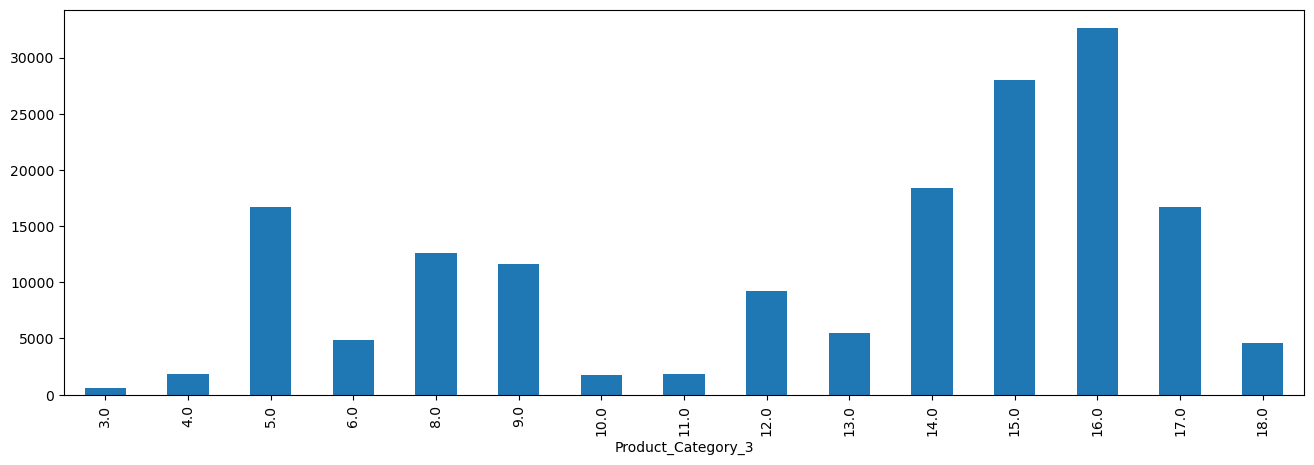

In [32]:
# Mismo tratamiento para la categoria 3

plt.figure(figsize=(16,5))
dataset.groupby(['Product_Category_3']).Product_Category_3.count().plot(kind='bar')


In [33]:
dataset['Product_Category_3'].isna().sum()

383247

In [34]:
dataset.loc[dataset.Product_Category_3.isna(),'Product_Category_3']=0
# Cantidad de filas que poseen NaNs en la característica.
dataset['Product_Category_3'].isna().sum()
dataset["Product_Category_3"]=dataset["Product_Category_3"].astype(int)
product_category_3_dummies = pd.get_dummies(dataset["Product_Category_3"], prefix="Product_Category_3")
product_category_3_dummies.info() 
dataset = pd.concat([dataset, product_category_3_dummies], axis=1)
dataset=dataset.drop(["Product_Category_3"], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   Product_Category_3_0   550068 non-null  uint8
 1   Product_Category_3_3   550068 non-null  uint8
 2   Product_Category_3_4   550068 non-null  uint8
 3   Product_Category_3_5   550068 non-null  uint8
 4   Product_Category_3_6   550068 non-null  uint8
 5   Product_Category_3_8   550068 non-null  uint8
 6   Product_Category_3_9   550068 non-null  uint8
 7   Product_Category_3_10  550068 non-null  uint8
 8   Product_Category_3_11  550068 non-null  uint8
 9   Product_Category_3_12  550068 non-null  uint8
 10  Product_Category_3_13  550068 non-null  uint8
 11  Product_Category_3_14  550068 non-null  uint8
 12  Product_Category_3_15  550068 non-null  uint8
 13  Product_Category_3_16  550068 non-null  uint8
 14  Product_Category_3_17  550068 non-null  uint8
 15  Product_Category_

In [35]:
# Para las categorias de User_ID y Product_ID se opta eliminarlas por su alta cardinalidad.

print("Datos diferentes de User_ID:",len(dataset.groupby(['User_ID']).User_ID.count()))
print("Datos diferentes de Product_ID:",len(dataset.groupby(['Product_ID']).Product_ID.count()))

Datos diferentes de User_ID: 5891
Datos diferentes de Product_ID: 3631


In [36]:
# Separamos el target y eliminamos las columnas que en este caso no se utilizaran.
y = dataset["Purchase"]

X=dataset.drop(["User_ID", "Product_ID", "Purchase"], axis=1)
print ("Output:",y.shape)
print ("Data Input:",X.shape)

Output: (550068,)
Data Input: (550068, 85)


#### Separación de datos para entrenamiento y test

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30)


In [38]:
class DefineDataset(Dataset):

    def __init__(self, X, y):
        super().__init__()
        self.X = X
        self.y = y

    def __len__(self):
        
        return self.X.shape[0]

    def __getitem__(self, idx):

        return self.X[idx], self.y[idx]

In [39]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

train = DefineDataset(X_train, y_train)
test = DefineDataset(X_test, y_test)

train_dataloader = DataLoader(train, batch_size=1024, shuffle=True)
test_dataloader = DataLoader(test, batch_size=1024, shuffle=True)

In [40]:

class NNet(torch.nn.Module):

    def __init__(self):
        super().__init__()
        
        # Layer lineal:
        self.linear_1 = torch.nn.Linear(in_features=85, out_features=100, bias=True)
    
        self.relu_1 = torch.nn.ReLU()
        
        self.linear_2 = torch.nn.Linear(in_features=100, out_features=50, bias=True)
        self.relu_2 = torch.nn.ReLU()
        

        self.output = torch.nn.Linear(in_features=50, out_features=1, bias=True)
       
    
    def forward(self, x): 
        x = self.linear_1(x) 
     
        x = self.relu_1(x)
     
        x = self.linear_2(x) 
      
        x = self.relu_2(x)
        x = self.output(x) 
        return x

In [41]:
nnet = NNet()
optimizer = torch.optim.Adam(nnet.parameters(), lr=0.005)
loss_function = torch.nn.BCEWithLogitsLoss(reduction="sum")

In [42]:
device = ""
if torch.cuda.is_available():
    device = "cuda:0"
else:
    device = "cpu"

print(device)

cpu


In [43]:
nnet.to(device)

# Trainning data
loss_list = []
train_auc = []
# Validation:
loss_list_val = []
valid_auc = []
#Test:
loss_list_test = []
test_auc = []
# Se corren 200 epochs
for epoch in range(200):
    running_loss = 0
    # En cada Epoch reinciamos el loss
    running_y_score = []
    running_y_label = []

    # Validation:
    running_loss_val = 0
    running_y_score_val = []
    running_y_label_val = []

    # Test:
    running_loss_test = 0
    running_y_score_test = []
    running_y_label_test = []
    
    # Train 
    nnet.train()

    # Recorremos los batches
    for i, data in enumerate(train_dataloader):

       
        X_batch, y_batch = data 
        X_batch = X_batch.to(device).float()
        Y_batch = y_batch.to(device).float()
      
        # Forward:
        optimizer.zero_grad()
        
        # Backpropagation:
        y_batch_output = nnet(X_batch).reshape(-1)
        y_batch_score = torch.sigmoid(y_batch_output).reshape(-1)

        
        # Calcula el loss.
        loss = loss_function(y_batch_output, Y_batch)
        
        # Gradiente del loss
        loss.backward()
    

        # Actualización de parametros:
        optimizer.step() 

        running_loss += loss.item()
        
        running_y_score += list(y_batch_score.detach().cpu().numpy()) 
        running_y_label += list(Y_batch.detach().cpu().numpy()) 


    # Validacion
    nnet.eval()
    with torch.no_grad():

      # Dataset de validación
      for i, data in enumerate(test_dataloader):
          X_batch_val, y_batch_val = data 
          X_batch_val = X_batch_val.to(device).float()
          Y_batch_val = y_batch_val.to(device).float()

          # Forward
          y_batch_output_val = nnet(X_batch_val).reshape(-1)
          y_batch_score_val = torch.sigmoid(y_batch_output_val).reshape(-1)

          # Loss Function
          loss_val = loss_function(y_batch_output_val, Y_batch_val)

          running_loss_val += loss_val.item()
          running_y_score_val += list(y_batch_score_val.detach().cpu().numpy())  
          running_y_label_val += list(Y_batch_val.detach().cpu().numpy()) 

    # Testing
    nnet.eval()
    with torch.no_grad():

      for i, data in enumerate(test_dataloader):
          X_batch_test, y_batch_test = data 
          X_batch_test = X_batch_test.to(device).float()
          Y_batch_test = y_batch_test.to(device).float()

          # Forward
          y_batch_output_test = nnet(X_batch_test).reshape(-1)
          y_batch_score_test = torch.sigmoid(y_batch_output_test).reshape(-1)

          # Función de pérdida
          loss_test = loss_function(y_batch_output_test, Y_batch_test)

          running_loss_test += loss_test.item()
          running_y_score_test += list(y_batch_score_test.detach().cpu().numpy())  
          running_y_label_test += list(Y_batch_test.detach().cpu().numpy())     

    #Metricas
    
    #Training:
    loss_list.append(running_loss)
    fpt, tpr, _ = metrics.roc_curve(running_y_label, running_y_score)
    auc = metrics.auc(fpt, tpr)
    train_auc.append(auc)
    print(f"Epoch {epoch} | Training loss: {running_loss} | AUC: {auc}")

    #Validation:
    loss_list_val.append(running_loss_val)
    fpt_val, tpr_val, _ = metrics.roc_curve(running_y_label_val, running_y_score_val)
    auc_val = metrics.auc(fpt_val, tpr_val)
    valid_auc.append(auc_val)
    print(f"Epoch {epoch} | Validation loss: {running_loss_val} | AUC: {auc_val}")

    


Epoch 0 | Training loss: 133920.29168701172 | AUC: 0.9233560344581735
Epoch 0 | Validation loss: 42443.55047607422 | AUC: 0.9303007883341797
Epoch 1 | Training loss: 128021.10122680664 | AUC: 0.9297603377532808
Epoch 1 | Validation loss: 42164.86784362793 | AUC: 0.9319695202602063
Epoch 2 | Training loss: 127073.35458374023 | AUC: 0.9312652296793604
Epoch 2 | Validation loss: 42135.31987762451 | AUC: 0.9326168491714837
Epoch 3 | Training loss: 126530.3062133789 | AUC: 0.9321787739356994
Epoch 3 | Validation loss: 42068.61054992676 | AUC: 0.9329127598768653
Epoch 4 | Training loss: 126219.66360473633 | AUC: 0.932631652588204
Epoch 4 | Validation loss: 42029.78611755371 | AUC: 0.9327405301670084
Epoch 5 | Training loss: 125906.51907348633 | AUC: 0.9332038498869165
Epoch 5 | Validation loss: 41868.431060791016 | AUC: 0.9332688975283515
Epoch 6 | Training loss: 125587.90744018555 | AUC: 0.933662145547443
Epoch 6 | Validation loss: 41993.42965698242 | AUC: 0.9332428158940673
Epoch 7 | Train

### Resultados

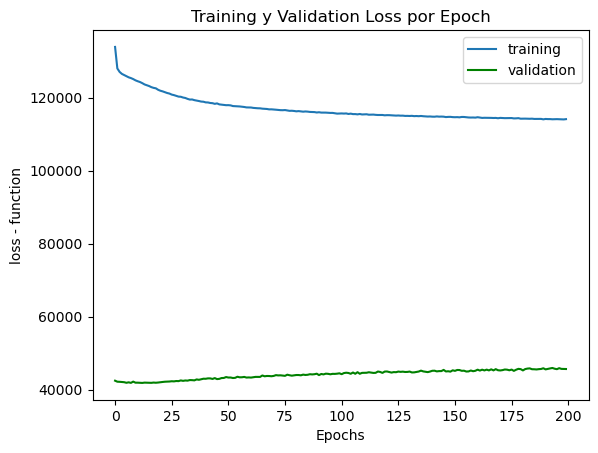

In [44]:
# Se plotea el loss para cada epoch de entrenamiento y validación.
fig, ax1 = plt.subplots(1,1)
x = range(0, len(loss_list))
ax1.plot(x, loss_list,label='training')
x = range(0, len(loss_list_val))
ax1.plot(x, loss_list_val,label='validation',c='g')
plt.title("Training y Validation Loss por Epoch")
plt.ylabel("loss - function")
plt.xlabel("Epochs")
plt.legend()
plt.show()

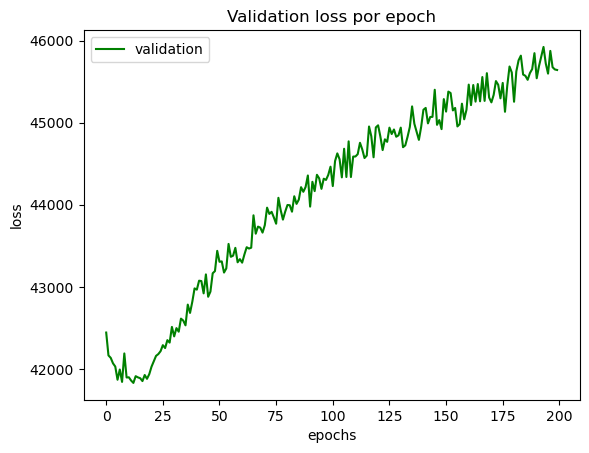

In [45]:
# Se plotea el loss para cada epoch de validación.
fig, ax1 = plt.subplots(1,1)
x = range(0, len(loss_list_val))
ax1.plot(x, loss_list_val,label='validation', c='g')
plt.title("Validation loss por epoch")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend()
plt.show()

#### Implementación de Embeddings

In [46]:
class DatasetEmbeddings(Dataset): 

    def __init__(self, X, user_idx, product_idx, y):
        super().__init__()
        self.X = X
        self.user_idx = user_idx
        self.product_idx = product_idx
        self.y = y

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        return self.X[idx], self.user_idx[idx], self.product_idx[idx], self.y[idx]

In [47]:
# Se obtienen los user ids que antes no se tuvieron en cuenta en el calculo sin embeddings
user_id = dataset.User_ID
unique = np.unique(user_id)
index = np.arange(0, len(unique))
user_id_to_index = {key: value for key, value in zip(unique, index)}
user_idx = np.array([user_id_to_index[user] for user in user_id])
print(min(user_idx))
print(max(user_idx))

0
5890


In [48]:
# Se obtienen los products ids que antes no se tuvieron en cuenta
product_id = dataset.Product_ID
unique = np.unique(product_id)
index = np.arange(0, len(unique))
product_id_to_index = {key: value for key, value in zip(unique, index)}
product_idx = np.array([product_id_to_index[product] for product in product_id])
print(min(product_idx))
print(max(product_idx))

0
3630


In [49]:


X = dataset.drop(columns=['Purchase', 'Product_ID', 'User_ID'])
y = dataset['Purchase']

# Se aplica normalización
X_norm = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

In [50]:
ds_indices = [user_id_to_index[u_id] for u_id in dataset.User_ID]
dataset["user_idx"] = ds_indices


In [51]:
ds_indices = [product_id_to_index[p_id] for p_id in dataset.Product_ID]
dataset["product_idx"] = ds_indices

In [52]:

dataset[["user_idx", "product_idx"]].join(X_norm)

,user_idx,product_idx,Gender,Marital_Status,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,...,Product_Category_3_9,Product_Category_3_10,Product_Category_3_11,Product_Category_3_12,Product_Category_3_13,Product_Category_3_14,Product_Category_3_15,Product_Category_3_16,Product_Category_3_17,Product_Category_3_18
0,0,672,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,2376,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,852,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,828,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,2734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,5883,3567,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
550064,5885,3568,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
550065,5886,3568,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
550066,5888,3568,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
embeddings_ds = dataset[["user_idx", "product_idx"]].join(X_norm)
X_train, X_valid, y_train, y_valid = train_test_split(embeddings_ds, y, test_size=0.25, random_state=12)

user_idx_train = X_train["user_idx"].to_numpy()
user_idx_valid = X_valid["user_idx"].to_numpy()

product_idx_train = X_train["product_idx"].to_numpy()
product_idx_valid = X_valid["product_idx"].to_numpy()

X_train = X_train.drop(columns=["product_idx", "user_idx"]).to_numpy()
y_train = y_train.to_numpy()

X_valid = X_valid.drop(columns=["product_idx", "user_idx"]).to_numpy()
y_valid = y_valid.to_numpy()

y_train = y_train.reshape(-1)
y_valid = y_valid.reshape(-1)

In [54]:
train = DatasetEmbeddings(X_train, user_idx_train, product_idx_train, y_train)
valid = DatasetEmbeddings(X_valid, user_idx_valid, product_idx_valid, y_valid)
train_dataloader = DataLoader(train, batch_size=1024, shuffle=True)
valid_dataloader = DataLoader(valid, batch_size=1024, shuffle=True)

In [55]:
class NNetWithEmbeddings(torch.nn.Module):

    def __init__(self, number_of_users, number_of_products, d_users, d_products):

        super().__init__()
        
        # creo un modulo embedding para users
        self.users_embedding = torch.nn.Embedding(num_embeddings=number_of_users, embedding_dim=d_users)
        
        # creo un modulo embedding para productos
        self.products_embedding = torch.nn.Embedding(num_embeddings=number_of_products, embedding_dim=d_products)

        # Igual que las capas anteriores
        self.linear_1 = torch.nn.Linear(in_features=(85 + d_users + d_products), 
                                        out_features=100, bias=True) 
        self.relu_1 = torch.nn.ReLU()

        self.output = torch.nn.Linear(in_features=100, out_features=1, bias=True)

    def forward(self, x, user_idx, product_idx):
        # Inicializacion de embeddings
        user_emb = self.users_embedding(user_idx) 
        prod_emb = self.products_embedding(product_idx) 

        final_input = torch.cat([x, user_emb, prod_emb], dim=1) 

        x = self.linear_1(final_input) 
        x = self.relu_1(x)   
        x = self.output(x) 
        return x

In [56]:
nnet = NNetWithEmbeddings(number_of_users=len(user_idx), number_of_products=len(product_idx), d_users=8, d_products=8)

optimizer = torch.optim.Adam(nnet.parameters(), lr=0.001)

loss_function = torch.nn.BCEWithLogitsLoss(reduction="sum")

In [57]:
################## TRAINING ##################
nnet.to(device)
loss_list = list()
valid_loss_list = list()
train_auc = list()
valid_auc = list()
ds_name = "dataset_1"
nnet_name = "embeddings"

for epoch in range(200):  # epochs
    epoch_loss = 0
    epoch_valid_loss = 0
    epoch_acc = 0
    running_y_score = list()
    running_y_label = list()
    valid_y_score = list()
    valid_y_label = list()

    nnet.train()
    for i, data in enumerate(train_dataloader):  # batches
        # Datos del batch
        X_batch, user_idx_batch, product_idx_batch, y_batch = data
        X_batch = X_batch.to(device).float()
        user_idx_batch = user_idx_batch.to(device)
        product_idx_batch = product_idx_batch.to(device)
        y_batch = y_batch.to(device).float()

        # forward
        optimizer.zero_grad()  # que el optim ponga los gradientes en 0
        y_batch_score = nnet(X_batch, user_idx_batch, product_idx_batch).reshape(-1)
        y_batch_hat = torch.sigmoid(y_batch_score).reshape(-1)

        # backpropagation
        loss = loss_function(y_batch_score, y_batch)
        loss.backward()  # hacer gradientes de score

        # actualizar parametros
        optimizer.step()

        epoch_loss += loss.item()
        running_y_score += list(y_batch_score.detach().cpu().numpy())
        running_y_label += list(y_batch.detach().cpu().numpy())

    nnet.eval()

    with torch.no_grad():
        for i, data in enumerate(valid_dataloader):
            X_valid_batch, user_idx_valid_batch, product_idx_valid_batch, y_valid_batch = data
            X_valid_batch = X_valid_batch.to(device).float()
            user_idx_valid_batch = user_idx_valid_batch.to(device)
            product_idx_valid_batch = product_idx_valid_batch.to(device)
            y_valid_batch = y_valid_batch.to(device).float()

            # forward
            y_valid_batch_score = nnet(X_valid_batch, user_idx_valid_batch, product_idx_valid_batch).reshape(-1)
            y_valid_batch_hat = torch.sigmoid(y_valid_batch_score).reshape(-1)

            valid_loss = loss_function(y_valid_batch_score, y_valid_batch)

            epoch_valid_loss += valid_loss.item()

            valid_y_score += list(y_valid_batch_score.detach().cpu().numpy())
            valid_y_label += list(y_valid_batch.detach().cpu().numpy())

    fpr, tpr, _ = metrics.roc_curve(running_y_label, running_y_score)
    epoch_auc = metrics.auc(fpr, tpr)

    val_fpr, val_tpr, _ = metrics.roc_curve(valid_y_label, valid_y_score)
    epoch_valid_auc = metrics.auc(val_fpr, val_tpr)

    train_auc.append(epoch_auc)
    valid_auc.append(epoch_valid_auc)
    loss_list.append(epoch_loss)
    valid_loss_list.append(epoch_valid_loss)

    print("Epoch:", epoch,
          "\tTraining Loss:", epoch_loss,
          "\tValidation Loss:", epoch_valid_loss,
          "\tAUC:", epoch_auc)
    
 

Epoch: 0 	Training Loss: 155581.8292541504 	Validation Loss: 41891.442237854004 	AUC: 0.9064311861418819
Epoch: 1 	Training Loss: 123512.73931884766 	Validation Loss: 40187.76877593994 	AUC: 0.9376298928484745
Epoch: 2 	Training Loss: 118462.99507141113 	Validation Loss: 39045.020568847656 	AUC: 0.9435133185567756
Epoch: 3 	Training Loss: 114596.2622833252 	Validation Loss: 38136.76779174805 	AUC: 0.9476528240296775
Epoch: 4 	Training Loss: 111437.99951171875 	Validation Loss: 37503.96979522705 	AUC: 0.9507672424953074
Epoch: 5 	Training Loss: 108981.0244140625 	Validation Loss: 37085.53251647949 	AUC: 0.9531071070343988
Epoch: 6 	Training Loss: 107040.28544616699 	Validation Loss: 36756.73455810547 	AUC: 0.9548976944036802
Epoch: 7 	Training Loss: 105400.61276245117 	Validation Loss: 36436.74352264404 	AUC: 0.9563656297915268
Epoch: 8 	Training Loss: 104171.51913452148 	Validation Loss: 36300.93503570557 	AUC: 0.9574523637071262
Epoch: 9 	Training Loss: 103101.39431762695 	Validation 

#### Resultados Obtenidos

[]

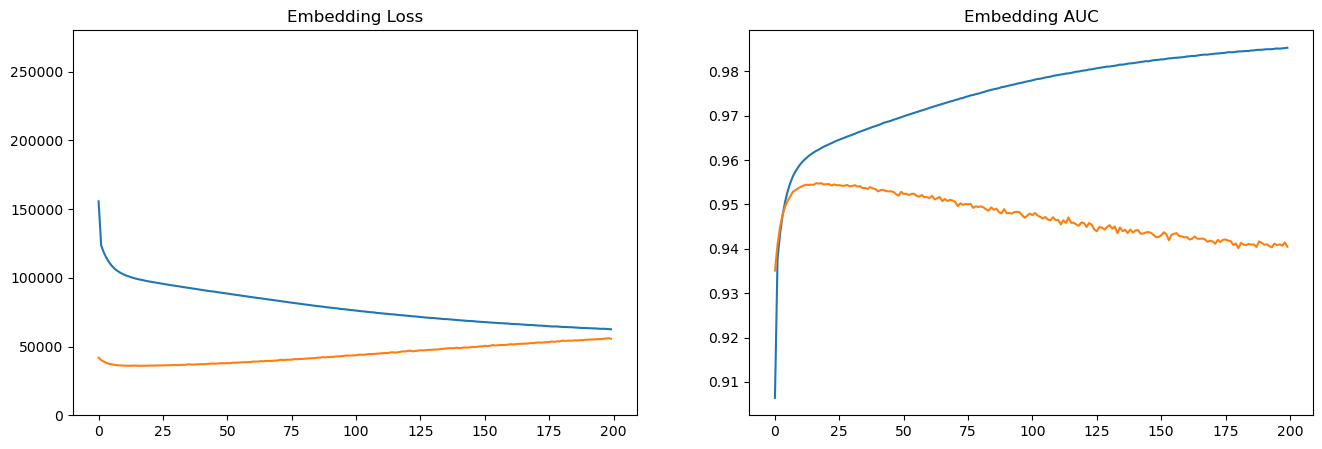

In [60]:
fig, ax = plt.subplots(1,2, figsize=(16, 5))
x = range(0, len(loss_list))
ax[0].plot(x, loss_list, label="Training Loss")
ax[0].plot(x, valid_loss_list, label="Validation Loss")
ax[0].set_ylim([0, 280000])
ax[0].set_title( "Embedding Loss")
x = range(0, len(train_auc))
ax[1].plot(x, train_auc, label="Training AUC")
ax[1].plot(x, valid_auc, label="Validation AUC")
ax[1].set_title("Embedding AUC")
plt.plot()


#### Conclusión

Comparando los modelos, vemos que el modelo con embedding tiene una disminucion el trainning loss teniendo en cuenta 200 epochs. Aunque si vemos el validation loss vemos que este sufre un aumento en su valor. 

Ademas podemos ver que el valor de AUC en validation no tiene un buen valor de performance por lo que podria inferirse que estaria haciendo un overfitting.

